          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

KeyboardInterrupt: 

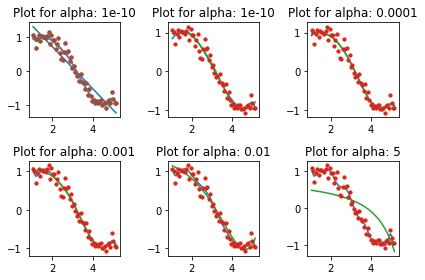

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
x=np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10) 
y=np.sin(x)+np.random.normal(0,0.15,len(x))
data=pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
for i in range(2,16): 
 colname='x_%d'%i 
 data[colname]=data['x']**i
print (data.head())
def linear_regression(data,power,models_to_plot):
 predictors=['x']
 if power>=2:
  predictors.extend(['x_%d'%i for i in range(2,power+1)])
 linreg=LinearRegression(normalize=True)
 linreg.fit(data[predictors],data['y'])
 y_pred=linreg.predict(data[predictors]) 
 if power in models_to_plot:
  plt.subplot(models_to_plot[power])
  plt.tight_layout()
  plt.plot(data['x'],y_pred)
  plt.plot(data['x'],data['y'],'.')
  plt.title('Plot for power: %d'%power) 
 rss=sum((y_pred-data['y'])**2)
 ret=[rss]
 ret.extend([linreg.intercept_])
 ret.extend(linreg.coef_)
 return ret
rcParams['figure.figsize']=12,10
col=['rss','intercept']+['coef_x_%d'%i for i in range(1,16)]
ind=['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple=pd.DataFrame(index=ind,columns=col)
models_to_plot={1:231,3:232,6:233,9:234,12:235,15:236}
for i in range(1,16):
 coef_matrix_simple.iloc[i-1,0:i+2]=linear_regression(data,power=i,models_to_plot=models_to_plot)
pd.options.display.float_format='{:,.2g}'.format
coef_matrix_simple
def ridge_regression(data,predictors,alpha,models_to_plot={}):
 ridgereg=Ridge(alpha=alpha,normalize=True)
 ridgereg.fit(data[predictors],data['y'])
 y_pred=ridgereg.predict(data[predictors])
 if alpha in models_to_plot:
  plt.subplot(models_to_plot[alpha])
  plt.tight_layout()
  plt.plot(data['x'],y_pred)
  plt.plot(data['x'],data['y'],'.')
  plt.title('Plot for alpha: %.3g'%alpha)
 rss=sum((y_pred-data['y'])**2)
 ret=[rss]
 ret.extend([ridgereg.intercept_])
 ret.extend(ridgereg.coef_)
 return ret
rcParams['figure.figsize']=12,10
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])
alpha_ridge=[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]
col=['rss','intercept']+['coef_x_%d'%i for i in range(1,16)]
ind=['alpha_%.2g'%alpha_ridge[i]for i in range(0,10)]
coef_matrix_ridge=pd.DataFrame(index=ind,columns=col)
models_to_plot={1e-15:231,1e-10:232,1e-4:233,1e-3:234,1e-2:235,5:236}
for i in range(10):
 coef_matrix_ridge.iloc[i,]=ridge_regression(data,predictors,alpha_ridge[i],models_to_plot)
pd.options.display.float_format='{:,.2g}'.format
coef_matrix_ridge
coef_matrix_ridge.apply(lambda x:sum(x.values==0),axis=1)
def lasso_regression(data,predictors,alpha,models_to_plot={}):
 lassoreg=Lasso(alpha=alpha,normalize=True,max_iter=1e5)
 lassoreg.fit(data[predictors],data['y'])
 y_pred=lassoreg.predict(data[predictors]) 
 if alpha in models_to_plot:
  plt.subplot(models_to_plot[alpha])
  plt.tight_layout()
  plt.plot(data['x'],y_pred)
  plt.plot(data['x'],data['y'],'.')
  plt.title('Plot for alpha: %.3g'%alpha) 
 rss=sum((y_pred-data['y'])**2)
 ret=[rss]
 ret.extend([lassoreg.intercept_])
 ret.extend(lassoreg.coef_)
 return ret
rcParams['figure.figsize']=12,10
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])
alpha_lasso=[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10]
col=['rss','intercept']+['coef_x_%d'%i for i in range(1,16)]
ind=['alpha_%.2g'%alpha_lasso[i]for i in range(0,10)]
coef_matrix_lasso=pd.DataFrame(index=ind,columns=col)
models_to_plot={1e-10:231,1e-5:232,1e-4:233,1e-3:234,1e-2:235,1:236}
for i in range(10):
 coef_matrix_lasso.iloc[i,]=lasso_regression(data,predictors,alpha_lasso[i],models_to_plot)
pd.options.display.float_format='{:,.2g}'.format
coef_matrix_lasso
coef_matrix_lasso.apply(lambda x:sum(x.values==0),axis=1)
